# 2 sum
Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target

Input: nums = [2,7,11,15], target = 9
Output: [0,1]
Explanation: Because nums[0] + nums[1] == 9, we return [0, 1].

In [3]:
nums = [2,7,11,15]

target = 18
dic = {}
output = []

for i, num in enumerate(nums):
    diff = target - num
    
    if diff in dic:
        output.append(i)
        output.append(dic[diff])
    else:
        dic[num] = i
output

[2, 1]

# Best Time to Buy and Sell Stock

You are given an array prices where prices[i] is the price of a given stock on the ith day.

You want to maximize your profit by choosing a single day to buy one stock and choosing a different day in the future to sell that stock.

Input: prices = [7,1,5,3,6,4]
Output: 5
Explanation: Buy on day 2 (price = 1) and sell on day 5 (price = 6), profit = 6-1 = 5.
Note that buying on day 2 and selling on day 1 is not allowed because you must buy before you sell.

In [7]:
prices = [7,1,5,3,6,4]

left = 0
right = 1
profit = 0

while right < len(prices):
    if prices[right] > prices[left]:
        profit = max(profit, prices[right] - prices[left])
        right = right + 1
    else:
        left = right
        right = right + 1
profit

5

# Contains Duplicate

Given an integer array nums, return true if any value appears at least twice in the array, and return false if every element is distinct.

Input: nums = [1,2,3,1]
Output: true

In [86]:
nums = [1,2,3,1]

dic = {}
outcome = False
for i, num in enumerate(nums):
    if num in dic:
        outcome = True
        break
    else:
        dic[num] = 1
print(outcome)

True


# Product of Array Except Self

Given an integer array nums, return an array answer such that answer[i] is equal to the product of all the elements of nums except nums[i].

The product of any prefix or suffix of nums is guaranteed to fit in a 32-bit integer.

You must write an algorithm that runs in O(n) time and without using the division operation.

Input: nums = [1,2,3,4]
Output: [24,12,8,6]

In [85]:
nums = [1,2,3,4]
output = []

product_to_left = [1]
product = 1

for i in range(len(nums)-1):
    product_to_left.append(product)
    product = product * nums[i+1]
    
product_to_left

product_to_right = [1]
product = 1

for i in reversed(range(len(nums)-1)):
    product = product * nums[i+1]
    product_to_right.append(product)
    
product_to_right = list(reversed(product_to_right))
product_to_right

for i in range(len(nums)):
    output.append(product_to_left[i]*product_to_right[i])
output

[24, 12, 8, 6]

# Maximum Subarray

Given an integer array nums, find the 
subarray with the largest sum, and return its sum.

Input: nums = [-2,1,-3,4,-1,2,1,-5,4]
Output: 6
Explanation: The subarray [4,-1,2,1] has the largest sum 6.

In [84]:
nums = [-2,1,-3,4,-1,2,1,-5,4]

currentsum = 0
maxsum = -10 **100

for num in nums:
    currentsum = max(num, currentsum + num)
    maxsum = max(maxsum, currentsum)
maxsum

6

# Maximum Product Subarray

Given an integer array nums, find a 
subarray that has the largest product, and return the product.

The test cases are generated so that the answer will fit in a 32-bit integer.

Input: nums = [2,3,-2,4]
Output: 6
Explanation: [2,3] has the largest product 6.

In [83]:
nums = [2,3,-2,4,3]

currentproduct = 1
negativeproduct = 1
maxproduct = -10 ** 100

for num in nums:
    temp = currentproduct * num
    currentproduct = max(currentproduct * num, num, negativeproduct * num)
    negativeproduct = min(temp, num, negativeproduct * num)
    maxproduct = max(maxproduct, currentproduct)
    
maxproduct

12

# Find Minimum in Rotated Sorted Array

Suppose an array of length n sorted in ascending order is rotated between 1 and n times. For example, the array nums = [0,1,2,4,5,6,7] might become:

[4,5,6,7,0,1,2] if it was rotated 4 times.
[0,1,2,4,5,6,7] if it was rotated 7 times.
Notice that rotating an array [a[0], a[1], a[2], ..., a[n-1]] 1 time results in the array [a[n-1], a[0], a[1], a[2], ..., a[n-2]].

Given the sorted rotated array nums of unique elements, return the minimum element of this array.

You must write an algorithm that runs in O(log n) time.


Input: nums = [3,4,5,1,2]
Output: 1
Explanation: The original array was [1,2,3,4,5] rotated 3 times.

In [82]:
nums = [4,5,6,1,2,3]

left = 0
right = len(nums)-1

while left < right:
    mid = (left + right)//2
    
    if nums[0] < nums[mid]:
        left = mid + 1 # min should be in the right side of mid
    else:
        right = mid  # min should be in the left side of mid
        
    print(left, right)

nums[left]

3 5
3 4
3 3


1

# Search in Rotated Sorted Array

There is an integer array nums sorted in ascending order (with distinct values).

Prior to being passed to your function, nums is possibly rotated at an unknown pivot index k (1 <= k < nums.length) such that the resulting array is [nums[k], nums[k+1], ..., nums[n-1], nums[0], nums[1], ..., nums[k-1]] (0-indexed). For example, [0,1,2,4,5,6,7] might be rotated at pivot index 3 and become [4,5,6,7,0,1,2].

Given the array nums after the possible rotation and an integer target, return the index of target if it is in nums, or -1 if it is not in nums.

You must write an algorithm with O(log n) runtime complexity.

Input: nums = [4,5,6,7,0,1,2], target = 0
Output: 4

In [81]:
nums = [3,4,5,6,7,0,1]
target = 1

left = 0
right = len(nums)-1

while left <= right:
    mid = (left + right) // 2
    if nums[mid] == target:
        print(mid)
        break
    
    if nums[left] <= nums[mid]: #inflection point will be to the right
        if nums[left] <= target <= nums[mid]:
            right = mid -1
        else:
            left = mid +1
   
    else: #nums[mid] to nums[right] ascending
        if nums[mid] <= target <= nums[right]:
            left = mid + 1
        else:
            right = mid - 1
        

6


# 3 sum

Given an integer array nums, return all the triplets [nums[i], nums[j], nums[k]] such that i != j, i != k, and j != k, and nums[i] + nums[j] + nums[k] == 0.

Notice that the solution set must not contain duplicate triplets.

 
Input: nums = [-1,0,1,2,-1,-4]
Output: [[-1,-1,2],[-1,0,1]]
Explanation: 
nums[0] + nums[1] + nums[2] = (-1) + 0 + 1 = 0.
nums[1] + nums[2] + nums[4] = 0 + 1 + (-1) = 0.
nums[0] + nums[3] + nums[4] = (-1) + 2 + (-1) = 0.
The distinct triplets are [-1,0,1] and [-1,-1,2].
Notice that the order of the output and the order of the triplets does not matter.

In [80]:
nums = [-1,0,1,2,-1,-4]
nums = sorted(nums)
output = []
s = set()
for i in range(len(nums)):
    l = i + 1
    r = len(nums)-1
    
    while l < r:
        add = nums[i] + nums[l] + nums[r]
        
        if add < 0:
            l = l + 1
        elif add > 0:
            r = r - 1
        else:
            s.add((nums[i], nums[l], nums[r]))
            l = l + 1
            r = r - 1
output = list(s)
output

[(-1, 0, 1), (-1, -1, 2)]

# Container With Most Water

You are given an integer array height of length n. There are n vertical lines drawn such that the two endpoints of the ith line are (i, 0) and (i, height[i]).

Find two lines that together with the x-axis form a container, such that the container contains the most water.

Return the maximum amount of water a container can store.

Notice that you may not slant the container.

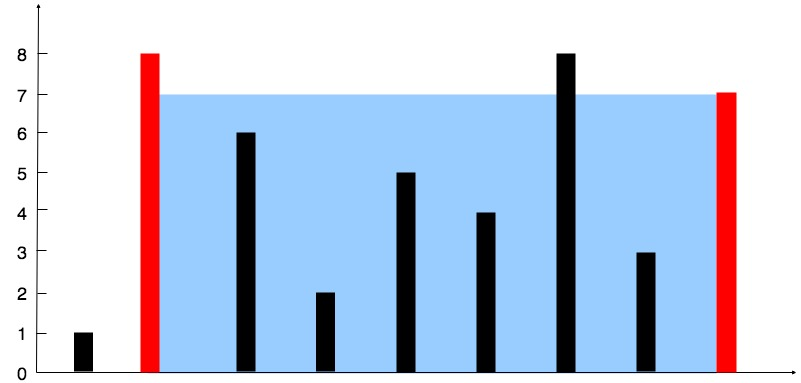

Input: height = [1,8,6,2,5,4,8,3,7]
Output: 49
Explanation: The above vertical lines are represented by array [1,8,6,2,5,4,8,3,7]. In this case, the max area of water (blue section) the container can contain is 49

In [79]:
height = [1,8,6,2,5,4,8,3,7]
area = 0

left = 0
right = len(height)-1
bestarea = 0

while left< right:
    if height[left] <= height[right]:
        area = height[left] * (right - left)
        left = left + 1
    else:
        area = height[right] * (right - left)
        right = right - 1
    bestarea = max(bestarea, area)

bestarea

49